In [1]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()

import mdtraj as md
import numpy as np
import os

import MDAnalysis as mda
import nglview as nv

import pandas as pd

import gmxapi as gmx

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import re, shutil, tempfile

def sed_inplace(filename, pattern, repl):
    '''
    Perform the pure-Python equivalent of in-place `sed` substitution: e.g.,
    `sed -i -e 's/'${pattern}'/'${repl}' "${filename}"`.
    '''
    # For efficiency, precompile the passed regular expression.
    pattern_compiled = re.compile(pattern)

    # For portability, NamedTemporaryFile() defaults to mode "w+b" (i.e., binary
    # writing with updating). This is usually a good thing. In this case,
    # however, binary writing imposes non-trivial encoding constraints trivially
    # resolved by switching to text writing. Let's do that.
    with tempfile.NamedTemporaryFile(mode='w', delete=False) as tmp_file:
        with open(filename) as src_file:
            for line in src_file:
                tmp_file.write(pattern_compiled.sub(repl, line))

    # Overwrite the original file with the munged temporary file in a
    # manner preserving file attributes (e.g., permissions).
    shutil.copystat(filename, tmp_file.name)
    shutil.move(tmp_file.name, filename)

# Prepare System

## Load init pulling trajectory

In [4]:
location = '/nethome/yzhuang/2020100800_alpha7_nachrs/SIMULATIONS/NACHRA7_NOPNU_EPJ_SLIPIDS/US/'

In [5]:
u = mda.Universe(location +'init.pdb',
                 location +'pulling_1.xtc')

/nethome/yzhuang/mdanalysis/package/MDAnalysis/topology/PDBParser.py:288: UserWarning: Serial numbers went over 100,000.  Higher serials have been guessed
  warnings.warn("Serial numbers went over 100,000.  "
/nethome/yzhuang/mdanalysis/package/MDAnalysis/topology/PDBParser.py:332: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/nethome/yzhuang/mdanalysis/package/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/nethome/yzhuang/mdanalysis/package/MDAnalysis/topology/PDBParser.py:382: UserWarning: Invalid atom serials were present, bonds will not be parsed
  warnings.warn("Invalid atom serials were present, bonds will not"
/nethome/yzhuang/mdanalysis/package/MDAnalysis/topology/PDBParser.py:202: User

In [6]:
pnu_ag = u.select_atoms('resname PNU')

In [7]:
from MDAnalysis.analysis import distances

In [8]:
def get_distance_xy(pos1, pos2):
    return np.sqrt((pos1[0] - pos2[0]) **2 + (pos1[1] - pos2[1]) **2)

In [9]:
pnu_loc = []
for ts in u.trajectory:
    pnu_loc.append(get_distance_xy(np.mean(u.select_atoms('resid 253 and name CA').positions,axis=0), np.mean(pnu_ag.positions,axis=0)))

0.0005 nm / ps

0.2 A / frame

In [10]:
u.trajectory.dt

40.0

<AxesSubplot:>

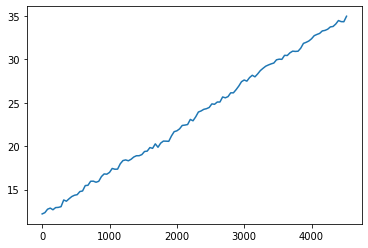

In [11]:
sns.lineplot(x=np.arange(u.trajectory.n_frames) * u.trajectory.dt,
             y=pnu_loc)

In [76]:
for ts, dist, act_dist in zip(u.trajectory[100::2], pnu_loc[100::2], np.arange(3.3,4.4,0.04)):
    sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(act_dist)
    os.mkdir(sub_dir)
    shutil.copy(location + 'PRODUCTION/pulling.mdp', sub_dir)
    sed_inplace(sub_dir + '/pulling.mdp', r'INIT_POS', '{:.2f}'.format(act_dist))
    shutil.copy(location + 'PRODUCTION/eq.mdp', sub_dir)
    sed_inplace(sub_dir + '/eq.mdp', r'INIT_POS', '{:.2f}'.format(act_dist))
    u.atoms.write(sub_dir + '/init.pdb')

In [35]:
for ts, dist, act_dist in zip(u.trajectory[::2], pnu_loc[::2], np.arange(1.3,3.3,0.04)):
    sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(act_dist)
    os.mkdir(sub_dir)
    shutil.copy(location + 'PRODUCTION/pulling.mdp', sub_dir)
    sed_inplace(sub_dir + '/pulling.mdp', r'INIT_POS', '{:.2f}'.format(act_dist))
    shutil.copy(location + 'PRODUCTION/eq.mdp', sub_dir)
    sed_inplace(sub_dir + '/eq.mdp', r'INIT_POS', '{:.2f}'.format(act_dist))
    u.atoms.write(sub_dir + '/init.pdb')

In [87]:
u.trajectory[-1]
sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(3.58)
os.mkdir(sub_dir)
shutil.copy(location + 'PRODUCTION/pulling.mdp', sub_dir)
sed_inplace(sub_dir + '/pulling.mdp', r'INIT_POS', '{:.2f}'.format(3.58))
shutil.copy(location + 'PRODUCTION/eq.mdp', sub_dir)
sed_inplace(sub_dir + '/eq.mdp', r'INIT_POS', '{:.2f}'.format(3.58))
u.atoms.write(sub_dir + '/init.pdb')

u.trajectory[-1]
sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(3.62)
os.mkdir(sub_dir)
shutil.copy(location + 'PRODUCTION/pulling.mdp', sub_dir)
sed_inplace(sub_dir + '/pulling.mdp', r'INIT_POS', '{:.2f}'.format(3.62))
shutil.copy(location + 'PRODUCTION/eq.mdp', sub_dir)
sed_inplace(sub_dir + '/eq.mdp', r'INIT_POS', '{:.2f}'.format(3.62))
u.atoms.write(sub_dir + '/init.pdb')

u.trajectory[-1]
sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(3.66)
os.mkdir(sub_dir)
shutil.copy(location + 'PRODUCTION/pulling.mdp', sub_dir)
sed_inplace(sub_dir + '/pulling.mdp', r'INIT_POS', '{:.2f}'.format(3.66))
shutil.copy(location + 'PRODUCTION/eq.mdp', sub_dir)
sed_inplace(sub_dir + '/eq.mdp', r'INIT_POS', '{:.2f}'.format(3.66))
u.atoms.write(sub_dir + '/init.pdb')


u.trajectory[-1]
sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(3.70)
os.mkdir(sub_dir)
shutil.copy(location + 'PRODUCTION/pulling.mdp', sub_dir)
sed_inplace(sub_dir + '/pulling.mdp', r'INIT_POS', '{:.2f}'.format(3.70))
shutil.copy(location + 'PRODUCTION/eq.mdp', sub_dir)
sed_inplace(sub_dir + '/eq.mdp', r'INIT_POS', '{:.2f}'.format(3.70))
u.atoms.write(sub_dir + '/init.pdb')

In [88]:
for act_dist in np.arange(3.58,3.74,0.04):
    sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(act_dist)
    gmx_run = gmx.commandline_operation('gmx',
                  arguments=['grompp', '-maxwarn', '-1'],
                  input_files={
                        '-f': sub_dir + '/eq.mdp',
                        '-c': location + '/init.pdb',
                        '-r': location + '/init.pdb',
                        '-p': location + '../topol_pnu.top',
                        '-n': location + 'index.ndx',

                  },
                  output_files={
                        '-o': sub_dir + '/eq.tpr'
                  }
                 )
    gmx_run.run()

In [98]:
for act_dist in np.arange(3.58,3.74,0.04):
    sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(act_dist)
    gmx_run = gmx.commandline_operation('gmx',
                  arguments=['grompp', '-maxwarn', '-1'],
                  input_files={
                        '-f': sub_dir + '/pulling.mdp',
                        '-c': sub_dir + '/eq.gro',
                        '-r': sub_dir + '/eq.gro',
                        '-p': location + '../topol_pnu.top',
                        '-n': location + 'index.ndx',

                  },
                  output_files={
                        '-o': sub_dir + '/pulling.tpr'
                  }
                 )
    gmx_run.run()

In [38]:
for ts, dist, act_dist in zip(u.trajectory[::2], pnu_loc[::2], np.arange(1.3,3.3,0.04)):
    sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(act_dist)
    gmx_run = gmx.commandline_operation('gmx',
                  arguments=['grompp', '-maxwarn', '-1'],
                  input_files={
                        '-f': sub_dir + '/eq.mdp',
                        '-c': location + '/init.pdb',
                        '-r': location + '/init.pdb',
                        '-p': location + '../topol_pnu.top',
                        '-n': location + 'index.ndx',

                  },
                  output_files={
                        '-o': sub_dir + '/eq.tpr'
                  }
                 )
    gmx_run.run()

In [77]:
for ts, dist, act_dist in zip(u.trajectory[100::2], pnu_loc[100::2], np.arange(3.3,4.4,0.04)):
    sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(act_dist)
    gmx_run = gmx.commandline_operation('gmx',
                  arguments=['grompp', '-maxwarn', '-1'],
                  input_files={
                        '-f': sub_dir + '/eq.mdp',
                        '-c': location + '/init.pdb',
                        '-r': location + '/init.pdb',
                        '-p': location + '../topol_pnu.top',
                        '-n': location + 'index.ndx',

                  },
                  output_files={
                        '-o': sub_dir + '/eq.tpr'
                  }
                 )
    gmx_run.run()

In [98]:
for ts, dist, act_dist in zip(u.trajectory[::2], pnu_loc[::2], np.arange(1.3,3.3,0.04)):
    sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(act_dist)
    gmx_run = gmx.commandline_operation('gmx',
                  arguments=['grompp', '-maxwarn', '-1'],
                  input_files={
                        '-f': sub_dir + '/pulling.mdp',
                        '-c': sub_dir + '/eq.gro',
                        '-r': sub_dir + '/eq.gro',
                        '-p': location + '../topol_pnu.top',
                        '-n': location + 'index.ndx',

                  },
                  output_files={
                        '-o': sub_dir + '/pulling.tpr'
                  }
                 )
    gmx_run.run()

In [98]:
for ts, dist, act_dist in zip(u.trajectory[100::2], pnu_loc[100::2], np.arange(3.3,4.4,0.04)):
    sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(act_dist)
    gmx_run = gmx.commandline_operation('gmx',
                  arguments=['grompp', '-maxwarn', '-1'],
                  input_files={
                        '-f': sub_dir + '/pulling.mdp',
                        '-c': sub_dir + '/eq.gro',
                        '-r': sub_dir + '/eq.gro',
                        '-p': location + '../topol_pnu.top',
                        '-n': location + 'index.ndx',

                  },
                  output_files={
                        '-o': sub_dir + '/pulling.tpr'
                  }
                 )
    gmx_run.run()

In [89]:
for act_dist in np.arange(3.3,3.74,0.04):
    sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(act_dist)
    gmx_run = gmx.commandline_operation('gmx',
                  arguments=['grompp', '-maxwarn', '-1'],
                  input_files={
                        '-f': sub_dir + '/pulling.mdp',
                        '-c': sub_dir + '/eq.gro',
                        '-r': sub_dir + '/eq.gro',
                        '-p': location + '../topol_pnu.top',
                        '-n': location + 'index.ndx',

                  },
                  output_files={
                        '-o': sub_dir + '/pulling.tpr'
                  }
                 )
    gmx_run.run()

In [41]:
location = '/nethome/yzhuang/2020100800_alpha7_nachrs/SIMULATIONS/NACHRA7_NOPNU_EPJ_SLIPIDS/US/'

In [42]:
u = mda.Universe(location +'ca.pdb',
                 location +'pulling_2_new.xtc')

/nethome/yzhuang/mdanalysis/package/MDAnalysis/topology/PDBParser.py:288: UserWarning: Serial numbers went over 100,000.  Higher serials have been guessed
  warnings.warn("Serial numbers went over 100,000.  "
/nethome/yzhuang/mdanalysis/package/MDAnalysis/topology/PDBParser.py:332: UserWarning: Unknown element  found for some atoms. These have been given an empty element record. If needed they can be guessed using MDAnalysis.topology.guessers.
  warnings.warn(wmsg)
/nethome/yzhuang/mdanalysis/package/MDAnalysis/topology/guessers.py:146: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/nethome/yzhuang/mdanalysis/package/MDAnalysis/topology/PDBParser.py:382: UserWarning: Invalid atom serials were present, bonds will not be parsed
  warnings.warn("Invalid atom serials were present, bonds will not"
/nethome/yzhuang/mdanalysis/package/MDAnalysis/topology/PDBParser.py:202: User

In [43]:
pnu_ag = u.select_atoms('resname PNU')

In [44]:
pnu_loc = []
for ts in u.trajectory:
    pnu_loc.append(get_distance_xy(np.mean(u.select_atoms('resid 253 and name CA').positions,axis=0), np.mean(pnu_ag.positions,axis=0)))

0.0005 nm / ps

0.2 A / frame

In [45]:
u.trajectory.dt

40.0

<AxesSubplot:>

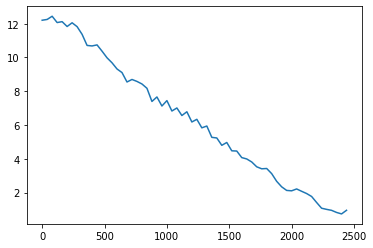

In [46]:
sns.lineplot(x=np.arange(u.trajectory.n_frames) * u.trajectory.dt,
             y=pnu_loc)

In [56]:
for ts, dist, act_dist in zip(u.trajectory[2::2], pnu_loc[2::2], np.arange(1.26,0.08,-0.04)):
    sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(act_dist)
    try:
        os.mkdir(sub_dir)
    except:
        pass
    shutil.copy(location + 'PRODUCTION/pulling.mdp', sub_dir)
    sed_inplace(sub_dir + '/pulling.mdp', r'INIT_POS', '{:.2f}'.format(act_dist))
    shutil.copy(location + 'PRODUCTION/eq.mdp', sub_dir)
    sed_inplace(sub_dir + '/eq.mdp', r'INIT_POS', '{:.2f}'.format(act_dist))
    u.atoms.write(sub_dir + '/init.pdb')

In [57]:
u.trajectory[-1]
sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(0.04)
os.mkdir(sub_dir)
shutil.copy(location + 'PRODUCTION/pulling.mdp', sub_dir)
sed_inplace(sub_dir + '/pulling.mdp', r'INIT_POS', '{:.2f}'.format(0.04))
shutil.copy(location + 'PRODUCTION/eq.mdp', sub_dir)
sed_inplace(sub_dir + '/eq.mdp', r'INIT_POS', '{:.2f}'.format(0.04))
u.atoms.write(sub_dir + '/init.pdb')

u.trajectory[-1]
sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(0.00)
os.mkdir(sub_dir)
shutil.copy(location + 'PRODUCTION/pulling.mdp', sub_dir)
sed_inplace(sub_dir + '/pulling.mdp', r'INIT_POS', '{:.2f}'.format(0.00))
shutil.copy(location + 'PRODUCTION/eq.mdp', sub_dir)
sed_inplace(sub_dir + '/eq.mdp', r'INIT_POS', '{:.2f}'.format(0.00))
u.atoms.write(sub_dir + '/init.pdb')

In [58]:
u.trajectory[-1]
sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(0.08)
os.mkdir(sub_dir)
shutil.copy(location + 'PRODUCTION/pulling.mdp', sub_dir)
sed_inplace(sub_dir + '/pulling.mdp', r'INIT_POS', '{:.2f}'.format(0.08))
shutil.copy(location + 'PRODUCTION/eq.mdp', sub_dir)
sed_inplace(sub_dir + '/eq.mdp', r'INIT_POS', '{:.2f}'.format(0.08))
u.atoms.write(sub_dir + '/init.pdb')

In [61]:
for act_dist in np.arange(1.26,0.08,-0.04):
    sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(act_dist)
    gmx_run = gmx.commandline_operation('gmx',
                  arguments=['grompp', '-maxwarn', '-1'],
                  input_files={
                        '-f': sub_dir + '/eq.mdp',
                        '-c': sub_dir + '/init.pdb',
                        '-r': sub_dir + '/init.pdb',
                        '-p': location + '../topol_pnu.top',
                        '-n': location + '/index.ndx',

                  },
                  output_files={
                        '-o': sub_dir + '/eq.tpr'
                  }
                 )
    gmx_run.run()
    if gmx_run.output.returncode.result() != 1:
        print(gmx_run.output.erroroutput.result())
    
sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(0.08)
gmx_run = gmx.commandline_operation('gmx',
              arguments=['grompp', '-maxwarn', '-1'],
              input_files={
                    '-f': sub_dir + '/eq.mdp',
                    '-c': sub_dir + '/init.pdb',
                    '-r': sub_dir + '/init.pdb',
                    '-p': location + '../topol_pnu.top',
                    '-n': location + 'index.ndx',

              },
              output_files={
                    '-o': sub_dir + '/eq.tpr'
              }
             )
gmx_run.run()

sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(0.04)
gmx_run = gmx.commandline_operation('gmx',
              arguments=['grompp', '-maxwarn', '-1'],
              input_files={
                    '-f': sub_dir + '/eq.mdp',
                    '-c': sub_dir + '/init.pdb',
                    '-r': sub_dir + '/init.pdb',
                    '-p': location + '../topol_pnu.top',
                    '-n': location + 'index.ndx',

              },
              output_files={
                    '-o': sub_dir + '/eq.tpr'
              }
             )
gmx_run.run()

sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(0.00)
gmx_run = gmx.commandline_operation('gmx',
              arguments=['grompp', '-maxwarn', '-1'],
              input_files={
                    '-f': sub_dir + '/eq.mdp',
                    '-c': sub_dir + '/init.pdb',
                    '-r': sub_dir + '/init.pdb',
                    '-p': location + '../topol_pnu.top',
                    '-n': location + 'index.ndx',

              },
              output_files={
                    '-o': sub_dir + '/eq.tpr'
              }
             )
gmx_run.run()

In [ ]:
for ts, dist, act_dist in zip(u.trajectory[::2], pnu_loc[::2], np.arange(1.26,0.08,-0.04)):
    sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(act_dist)
    gmx_run = gmx.commandline_operation('gmx',
                  arguments=['grompp', '-maxwarn', '-1'],
                  input_files={
                        '-f': sub_dir + '/pulling.mdp',
                        '-c': sub_dir + '/eq.gro',
                        '-r': sub_dir + '/eq.gro',
                        '-p': location + '../topol_pnu.top',
                        '-n': location + 'index.ndx',

                  },
                  output_files={
                        '-o': sub_dir + '/pulling.tpr'
                  }
                 )
    gmx_run.run()
    if gmx_run.output.returncode.result() != 1:
        print(gmx_run.output.erroroutput.result())
sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(0.08)
gmx_run = gmx.commandline_operation('gmx',
              arguments=['grompp', '-maxwarn', '-1'],
              input_files={
                    '-f': sub_dir + '/pulling.mdp',
                        '-c': sub_dir + '/eq.gro',
                        '-r': sub_dir + '/eq.gro',
                    '-p': location + '../topol_pnu.top',
                    '-n': location + 'index.ndx',

              },
              output_files={
                    '-o': sub_dir + '/pulling.tpr'
              }
             )
gmx_run.run()
if gmx_run.output.returncode.result() != 1:
    print(gmx_run.output.erroroutput.result())
    
sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(0.04)
gmx_run = gmx.commandline_operation('gmx',
              arguments=['grompp', '-maxwarn', '-1'],
              input_files={
                    '-f': sub_dir + '/pulling.mdp',
                        '-c': sub_dir + '/eq.gro',
                        '-r': sub_dir + '/eq.gro',
                    '-p': location + '../topol_pnu.top',
                    '-n': location + 'index.ndx',

              },
              output_files={
                    '-o': sub_dir + '/pulling.tpr'
              }
             )
gmx_run.run()
if gmx_run.output.returncode.result() != 1:
    print(gmx_run.output.erroroutput.result())
        
sub_dir = location + 'PRODUCTION/' + '{:.2f}'.format(0.00)
gmx_run = gmx.commandline_operation('gmx',
              arguments=['grompp', '-maxwarn', '-1'],
              input_files={
                    '-f': sub_dir + '/pulling.mdp',
                        '-c': sub_dir + '/eq.gro',
                        '-r': sub_dir + '/eq.gro',
                    '-p': location + '../topol_pnu.top',
                    '-n': location + 'index.ndx',

              },
              output_files={
                    '-o': sub_dir + '/pulling.tpr'
              }
             )
gmx_run.run()
if gmx_run.output.returncode.result() != 1:
    print(gmx_run.output.erroroutput.result())

## Analaysis

In [5]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()

import mdtraj as md
import numpy as np
import os

import MDAnalysis as mda
import nglview as nv

import pandas as pd

import gmxapi as gmx

In [6]:
from manuscript import *

<Figure size 432x288 with 0 Axes>

In [7]:
sns.set(style="ticks",context='paper',font_scale=2)

In [8]:
location = '/nethome/yzhuang/2020100800_alpha7_nachrs/SIMULATIONS/NACHRA7_NOPNU_EPJ_SLIPIDS/US/PRODUCTION/'

In [7]:
tpr_ensemble = []
pullx_ensemble = []

for directory in os.walk(location):
    if 'pulling_pullx.xvg' in directory[2]:
        tpr_ensemble.append(directory[0] + '/pulling.tpr')
        pullx_ensemble.append(directory[0] + '/pulling_pullx.xvg')
    
with open(location + 'tpr-files.dat', 'w') as tpr_dat_file:
    tpr_dat_file.write("\n".join(tpr_ensemble))
with open(location + 'pullx-files.dat', 'w') as pullx_dat_file:
    pullx_dat_file.write("\n".join(pullx_ensemble))

NameError: name 'location' is not defined

In [9]:
import gmxapi as gmx

In [ ]:
for pullx in pullx_ensemble:
    with open(pullx, 'r') as f:
        lines = f.readlines(-1)
        print(lines[-2:])
        print('')

In [ ]:
wham_bin = 500
wham_temp = 300
wham_b = 1000
wham_nbootstrap = 20
wham_zprof0 = 0
wham_e = 100000

wham = gmx.commandline_operation('gmx',
                                 ['wham', '-ac'],
                                 input_files={
                                              '-ix': location + 'pullx-files.dat',
                                              '-it': location + 'tpr-files.dat',
                                              '-bins': str(wham_bin),
                                              '-temp': str(wham_temp),
                                              '-unit': 'kCal',
                                              '-b': str(wham_b),
                                            #  '-e': str(wham_e),
                                              '-nBootstrap': str(wham_nbootstrap),
                                              '-zprof0': str(wham_zprof0),
                                             # '-min': str(wham_min),
                                             # '-max': str(wham_max)
                                 },
                                 output_files={'-o': location + 'profile.xvg',
                                             '-hist': location + 'histo.xvg',
                                             '-bsres': location + 'bsResult.xvg',
                                             '-bsprof': location + 'bsProfs.xvg'})
wham.run()
if wham.output.erroroutput.result() != "":
    print(wham.output.erroroutput.result())

In [10]:
import glob

In [11]:
try:
    for f in glob.glob(location + '/#*'):
        os.remove(f)
except:
    pass

In [12]:
class USProfile_XVG(object):
    def __init__(self, location):
        self.filename = location + 'profile.xvg'
        self.md_name = location.split('/')[-3]
        self.ion_type = location.split('/')[-2].split('_')[-1]
        self.read()
        
    def read(self):
        self.profile = pd.read_table(self.filename,
                                 header=None,
                                 names=['coord','energy'],
                                 sep='\s+',
                                 error_bad_lines=False,
                                 skiprows=17)
        self.profile.coord = self.profile.coord.apply(float)
        self.profile.coord = self.profile.coord * 10

        self.profile.energy = self.profile.energy.apply(float)

In [13]:
class UShisto_XVG(object):
    def __init__(self, walker, location):
        self.filename = location + 'histo.xvg'
        self.md_name = location.split('/')[-3]
        self.ion_type = location.split('/')[-2].split('_')[-1]
        self.read()
        
    def read(self):
        self.profile = pd.read_table(self.filename,
                                 header=None,
                                 names=['Time','Position'],
                                 sep='\s+',
                                 error_bad_lines=False,
                                 skiprows=17)
        self.profile.Position = self.profile.Position.apply(float)
        self.profile.Time = self.profile.Time.apply(float)

In [14]:
class USbsResult_XVG(object):
    def __init__(self, location):
        self.filename = location + 'bsResult.xvg'
        self.md_name = location.split('/')[-3]
        self.ion_type = location.split('/')[-2].split('_')[-1]
        self.read()
        
    def read(self):
        self.profile = pd.read_table(self.filename,
                                 header=None,
                                 names=['coord','energy', 'energy_std'],
                                 sep='\s+',
                                 error_bad_lines=False,
                                 skiprows=18)
        self.profile.coord = self.profile.coord.apply(float)
        self.profile.coord = self.profile.coord * 10

        self.profile.energy = self.profile.energy.apply(float)
        self.profile.energy_std = self.profile.energy_std.apply(float)

In [15]:
class USbsProfs_XVG(object):
    def __init__(self, walker, location):
        self.filename = location + 'profile.xvg'
        self.md_name = location.split('/')[-3]
        self.ion_type = location.split('/')[-2].split('_')[-1]
        self.read()
        
    def read(self):
        self.profile = pd.read_table(self.filename,
                                 header=None,
                                 names=['Time','Position'],
                                 sep='\s+',
                                 error_bad_lines=False,
                                 skiprows=17)
        self.profile.Position = self.profile.Position.apply(float)
        self.profile.Time = self.profile.Time.apply(float)

In [14]:
profile = USProfile_XVG(location)

NameError: name 'location' is not defined

In [16]:
def plot_us_pmf(us_file, xdata, ax, skip=10):
    if 'energy_std' in us_file.profile.keys():
        l = ax.errorbar(us_file.profile[xdata][::skip],
                    us_file.profile['coord'][::skip],
                    xerr = us_file.profile['energy_std'][::skip],errorevery=5,capsize=5)
        l[0].set_linewidth(3)
        l[0].set_marker(".")
        l[0].set_markerfacecolor('white')
    else:
        l = ax.plot(us_file.profile[xdata][::skip],
                    us_file.profile['coord'][::skip])
        l[0].set_linewidth(2)
        l[0].set_marker("*")
        l[0].set_markerfacecolor('white')
    ax.set_ylim(-5,40)
    ax.set_xlabel(xdata + ' (kcal/mol)')
    ax.yaxis.set_tick_params(width=4)
    ax.xaxis.set_tick_params(width=4)

    ax.set_ylabel('Coord along axis(Å)')
#    l[0].set_color(palette[us_file.md_name])

In [17]:
palette={'NACHRA7_NOPNU_EPJ_POPC':'#e66101',
         'NACHRA7_EPJ_POPC':'#fdb863',
         'NACHRA7_BGT_POPC':'#5e3c99'}

In [18]:
def plot_auxilary(ax, ion=False, system=False):
    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

    ax2.set_ylabel('AnVnotations')  # we already handled the x-label with ax1
    ax2.set_ylabel('')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y',direction='in')
    ax2.set_ylim(ax.get_ylim())

    ax2.spines['top'].set_linewidth(4)
    ax2.spines['right'].set_linewidth(4)
    ax2.yaxis.set_tick_params(width=4)
    ax2.set_yticks([2,13,35])
    ax2.set_yticklabels(['Pore', 'Binding \nSite', 'Lipid'])

    if ion:
        bar_list = []
        bar_list.append(plt.Line2D([0], [0],color='black',linewidth=1,marker='*',markerfacecolor='white'))
        bar_list.append(plt.Line2D([0], [0],color='black',linewidth=1,marker='h',markerfacecolor='white'))
        bar_list.append(plt.Line2D([0], [0],color='black',linewidth=1,marker='x',markerfacecolor='white'))
        bar_list.append(plt.Line2D([0], [0],color='black',linewidth=1,marker='v',markerfacecolor='white'))
        bar_list.append(plt.Line2D([0], [0],color='black',linewidth=1,marker='D',markerfacecolor='white'))
        ion_list = ['SOD','CAL','CAM','CLA','POT']
        l = plt.legend(bar_list, ion_list, loc=3, ncol = 1, prop={'size':15})
        l.draw_frame(False)

        ax = plt.gca().add_artist(l)
    if system: 
        bar_list_2 = []
        bar_list_2.append(plt.Line2D([0], [0],color='#e66101',linewidth=3))
        bar_list_2.append(plt.Line2D([0], [0],color='#fdb863',linewidth=3))
        bar_list_2.append(plt.Line2D([0], [0],color='#5e3c99',linewidth=3))
        sim_list = ['EPJ_PNU','EPJ','BGT']
        l_2 = plt.legend(bar_list_2, sim_list, loc=1, ncol = 3, prop={'size':15})
        l_2.draw_frame(False)


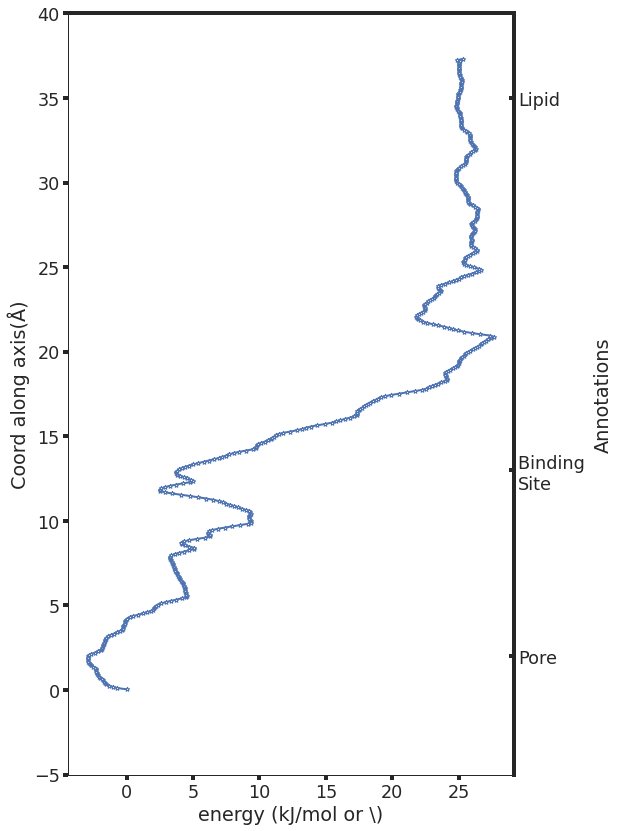

In [16]:
fig, ax = plt.subplots(figsize=(8,14))
plot_us_pmf(profile, 'energy', ax, skip=1)
    
plot_auxilary(ax)
plt.show()

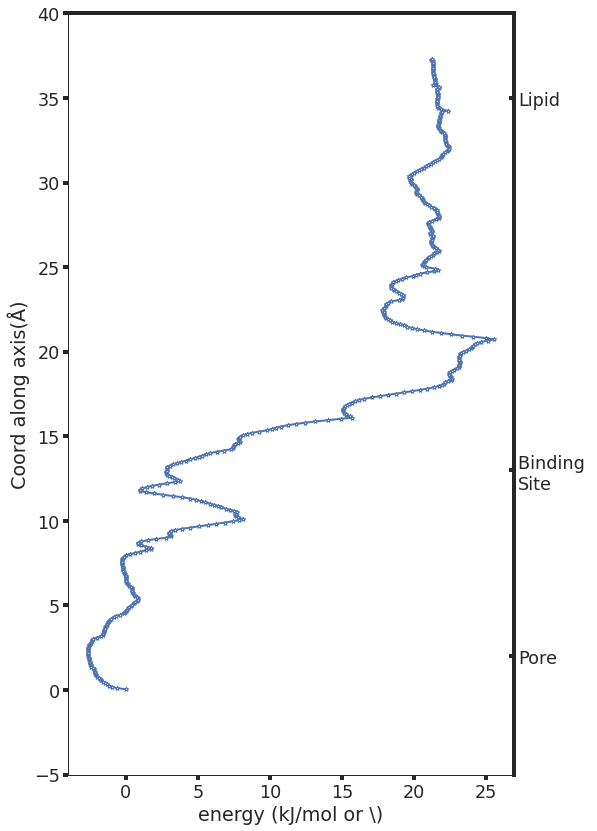

In [24]:
fig, ax = plt.subplots(figsize=(8,14))
plot_us_pmf(profile, 'energy', ax, skip=1)
    
plot_auxilary(ax)
plt.show()

In [20]:
bsprofile = USbsResult_XVG(location)

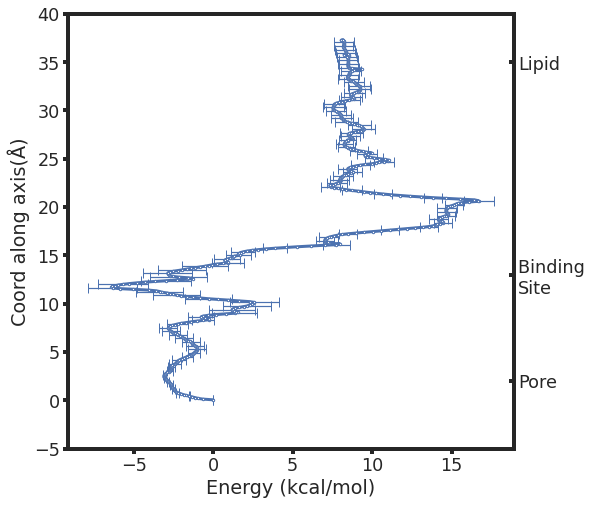

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
plot_us_pmf(bsprofile, 'energy', ax, skip=1)
    
plot_auxilary(ax)
plt.locator_params(axis='x', nbins=9)
set_axis_boarder(ax)
ax.set_xlabel('Energy (kcal/mol)')
plt.savefig('Figures/pnu_pmf_aa.pdf',bbox_inches = 'tight', pad_inches=0.1, transparent=False)

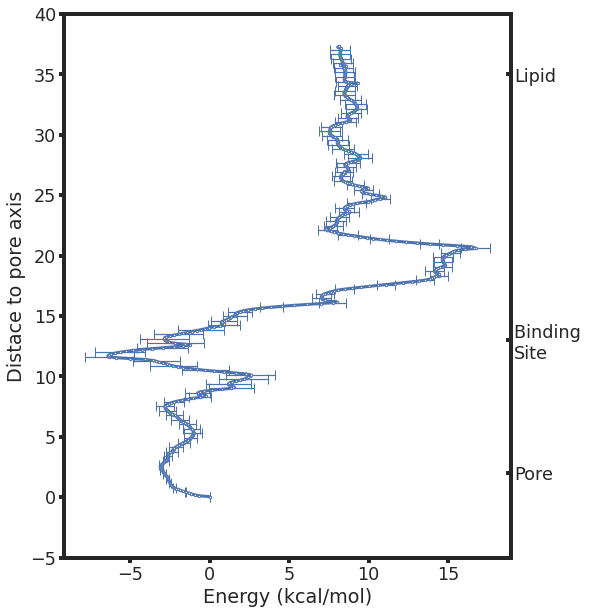

In [24]:
fig, ax = plt.subplots(figsize=(8,10))
plot_us_pmf(bsprofile, 'energy', ax, skip=1)
    
plot_auxilary(ax)
plt.locator_params(axis='x', nbins=9)
set_axis_boarder(ax)
ax.set_ylabel('Distace to pore axis')
ax.set_xlabel('Energy (kcal/mol)')

plt.savefig('Figures/pnu_pmf_aa.png',bbox_inches = 'tight', pad_inches=0.1, transparent=False)

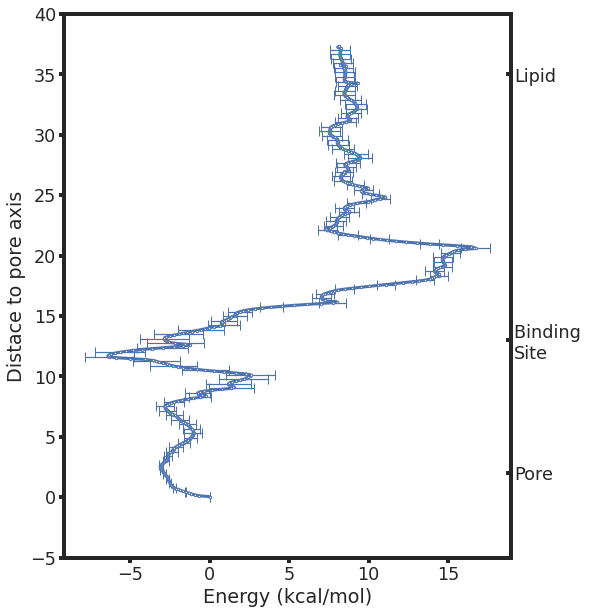

In [24]:
fig, ax = plt.subplots(figsize=(8,10))
plot_us_pmf(bsprofile, 'energy', ax, skip=1)
    
plot_auxilary(ax)
plt.locator_params(axis='x', nbins=9)
set_axis_boarder(ax)
ax.set_ylabel('Distace to pore axis')
ax.set_xlabel('Energy (kcal/mol)')

plt.savefig('Figures/pnu_pmf_aa.png',bbox_inches = 'tight', pad_inches=0.1, transparent=False)

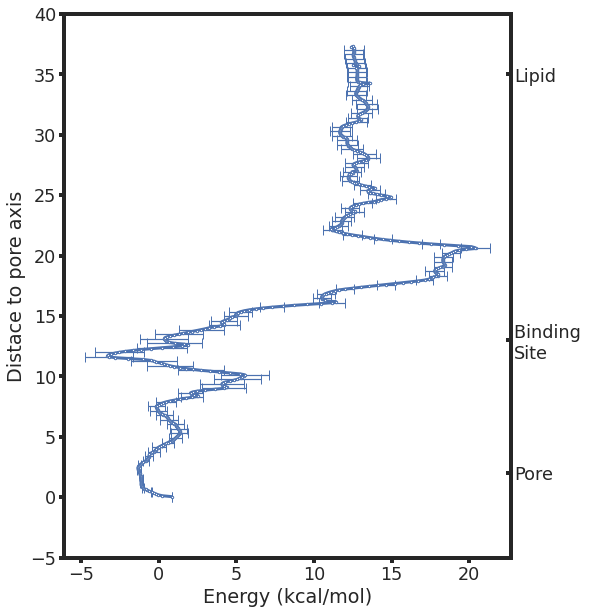

In [42]:
fig, ax = plt.subplots(figsize=(8,10))
plot_us_pmf(bsprofile, 'energy_corrected', ax, skip=1)
    
plot_auxilary(ax)
plt.locator_params(axis='x', nbins=9)
set_axis_boarder(ax)
ax.set_ylabel('Distace to pore axis')
ax.set_xlabel('Energy (kcal/mol)')

plt.savefig('Figures/pnu_pmf_aa.png',bbox_inches = 'tight', pad_inches=0.1, transparent=False)

In [40]:
bsprofile.profile['energy_entropic'] = bsprofile.profile.coord.apply(lambda x: 2 * 0.593 * np.log(x + 2))

In [41]:
bsprofile.profile['energy_corrected'] = bsprofile.profile.energy + bsprofile.profile.energy_entropic

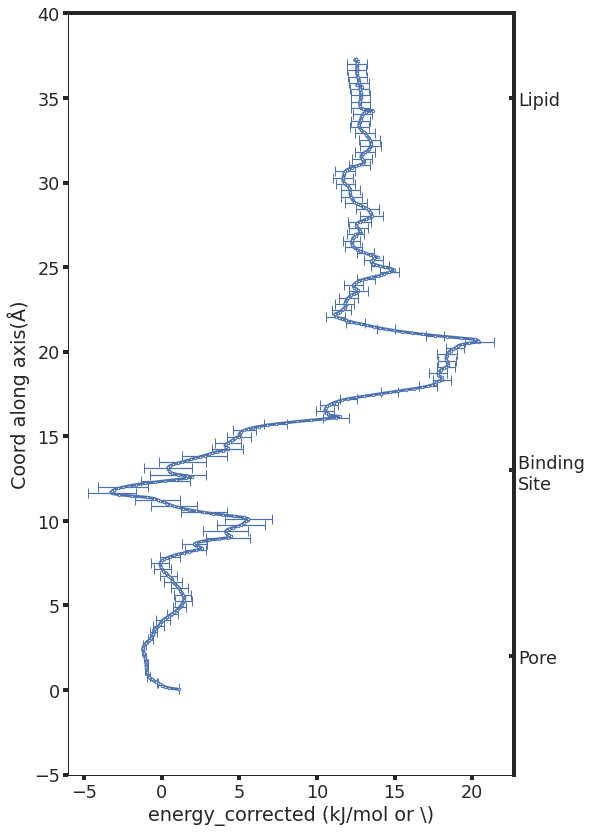

In [30]:
fig, ax = plt.subplots(figsize=(8,14))
plot_us_pmf(bsprofile, 'energy_corrected', ax, skip=1)
    
plot_auxilary(ax)
plt.locator_params(axis='x', nbins=9)
plt.show()

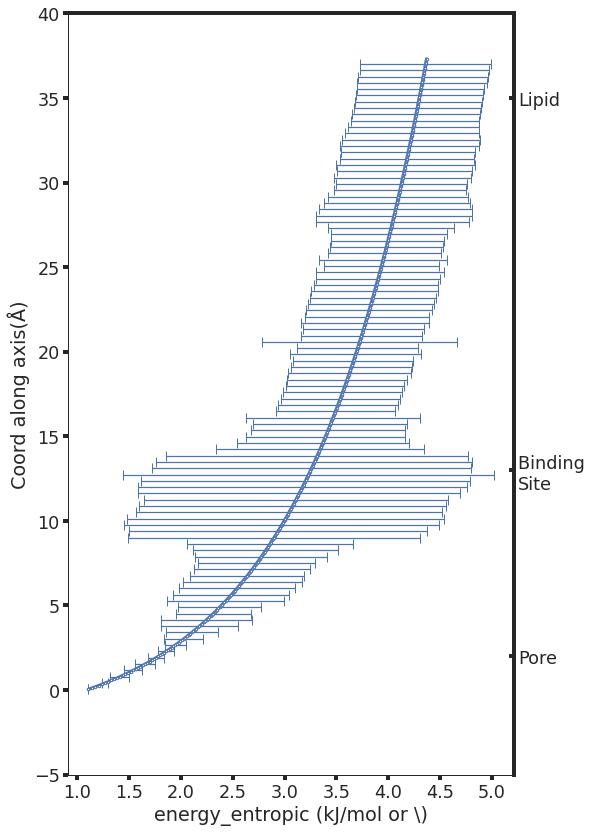

In [31]:
fig, ax = plt.subplots(figsize=(8,14))
plot_us_pmf(bsprofile, 'energy_entropic', ax, skip=1)
    
plot_auxilary(ax)
plt.locator_params(axis='x', nbins=9)
plt.show()